<a href="https://colab.research.google.com/github/jiorjioo/my-topspotify2024-sentiment-analysis/blob/main/Formulating_mantras_for_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ASUMSI FLOW:
1. Scraping spotify ID dari playlist "Your Top Song 2024" (reference: https://medium.com/@osiriscs/scrapping-spotify-with-python-from-scratch-34c5017e522e)
2. Ambil data nama artis, judul lagu, genre, album, dan track feature lainnya
3. Scraping lirik dari data judul lagu
4. Lakuin analisis kayak di medium https://towardsdatascience.com/how-to-analyze-emotions-and-words-of-the-lyrics-from-your-favorite-music-artist-bbca10411283

## Scraping Lirik lagu

### Cleaning Data

In [1]:
import pandas as pd

df1 = pd.read_csv('artist_data_with_lyrics.csv')
df1

,artist,song_title,album,genres,lyrics
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ..."
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati..."
...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu adaUntuk ..."
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r..."
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J..."
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplahBersiap-siap siap...


In [2]:
import re

def separate_capitalized_words(text):
    result = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    return result

df1['lyrics'] = df1['lyrics'].apply(separate_capitalized_words)


In [3]:
df1

,artist,song_title,album,genres,lyrics
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ..."
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati..."
...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu ada Untuk..."
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r..."
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J..."
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplah Bersiap-siap sia...


In [4]:
def text_preprocessing(text):
  text= text.lower()
  text = re.sub(r'[-+]?[0-9]+', " ", text)
  text = re.sub(r"instrumental|intro|guitar|solo|lirik| lirik |lirik |verse|chorus"," ", text)
  text = re.sub(r'[^\w\s]',' ', text)
  text = text.strip()
  return text


In [5]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Buat fungsi untuk langkah stemming bahasa Indonesia
def stemming(text):
  text = stemmer.stem(text)
  return text

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [77]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')
stopwords_eng = stopwords.words('english')
# Buat fungsi untuk langkah stopword removal

more_stopword = ['beni', "lyric", "not", "found", "aa", "nananana", "ah", "la", "oh", "yeah", "ooh", "oooh", "pre", "halo", "yang", "ooo", "oo", "lirik"]                    # Tambahkan kata lain dalam daftar stopword
stopwords_ind = more_stopword + stopwords_eng + stopwords_ind

def remove_stop_words(text):
  clean_words = []
  text = text.split()
  for word in text:
      if word not in stopwords_ind:
          clean_words.append(word)
  return " ".join(clean_words)

In [78]:
!pip install swifter #Install swifter. digunakan untuk meningkatkan kecepatan proses pandas
import swifter

In [79]:
def text_preprocessing_process(text):
  text = text_preprocessing(text)
  text = remove_stop_words(text)
  text = stemming(text)

  return text

In [80]:
df1['clean_lyrics'] = df1['lyrics'].swifter.apply(text_preprocessing_process)

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

In [81]:
df1

,artist,song_title,album,genres,lyrics,clean_lyrics,token
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ...",saat jalan berangkat semenjak pagi merah tel b...,"[saat, jalan, berangkat, semenjak, pagi, merah..."
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...,raya besok sisa sengsara pulang kau teman diri...,"[raya, besok, sisa, sengsara, pulang, kau, tem..."
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...,ku jalan tiada henti tuk cari baik hati peduli...,"[ku, jalan, tiada, henti, tuk, cari, baik, hat..."
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...,hujan reda percik air bumi derap langkah kaki ...,"[hujan, reda, percik, air, bumi, derap, langka..."
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati...",x risalah ikat batin raga kunci sang maha daya...,"[x, risalah, ikat, batin, raga, kunci, sang, m..."
...,...,...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu ada Untuk...",kau tertawa lupa salah ikut muda jiwa remaja s...,"[kau, tertawa, lupa, salah, ikut, muda, jiwa, ..."
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r...",abadi nyala pegang nyata andal kawan kau ingat...,"[abadi, nyala, pegang, nyata, andal, kawan, ka..."
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J...",ey holm linka med jack vi whippar en till vers...,"[ey, holm, linka, med, jack, vi, whippar, en, ..."
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplah Bersiap-siap sia...,bar baris siap siap sambut sambut istilah univ...,"[bar, baris, siap, siap, sambut, sambut, istil..."


In [82]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [83]:
df1['token'] = [nltk.word_tokenize(i) for i in df1.clean_lyrics] #tokenize string

In [84]:
df1

,artist,song_title,album,genres,lyrics,clean_lyrics,token
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ...",saat jalan berangkat semenjak pagi merah tel b...,"[saat, jalan, berangkat, semenjak, pagi, merah..."
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...,raya besok sisa sengsara pulang kau teman diri...,"[raya, besok, sisa, sengsara, pulang, kau, tem..."
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...,ku jalan tiada henti tuk cari baik hati peduli...,"[ku, jalan, tiada, henti, tuk, cari, baik, hat..."
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...,hujan reda percik air bumi derap langkah kaki ...,"[hujan, reda, percik, air, bumi, derap, langka..."
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati...",x risalah ikat batin raga kunci sang maha daya...,"[x, risalah, ikat, batin, raga, kunci, sang, m..."
...,...,...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu ada Untuk...",kau tertawa lupa salah ikut muda jiwa remaja s...,"[kau, tertawa, lupa, salah, ikut, muda, jiwa, ..."
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r...",abadi nyala pegang nyata andal kawan kau ingat...,"[abadi, nyala, pegang, nyata, andal, kawan, ka..."
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J...",ey holm linka med jack vi whippar en till vers...,"[ey, holm, linka, med, jack, vi, whippar, en, ..."
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplah Bersiap-siap sia...,bar baris siap siap sambut sambut istilah univ...,"[bar, baris, siap, siap, sambut, sambut, istil..."


## Sentiment Analysis using IndoBERT

source : https://huggingface.co/taufiqdp/indonesian-sentiment

In [85]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("taufiqdp/indonesian-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("taufiqdp/indonesian-sentiment")

class_names = ['negatif', 'netral', 'positif']




In [86]:
text = "dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah oh air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup hati hati pilih racun hati hati hati dur dehidrasi mata air semu dehidrasi paksa erti"
tokenized_text = tokenizer(text, return_tensors='pt')

with torch.inference_mode():
    logits = model(**tokenized_text)['logits']

result = class_names[logits.argmax(dim=1)]
score = logits.softmax(dim=1).max().item()
print(result)
print(score)

negatif
0.9941917061805725


In [87]:
df_sentiment = df1.copy()
df_sentiment

,artist,song_title,album,genres,lyrics,clean_lyrics,token
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ...",saat jalan berangkat semenjak pagi merah tel b...,"[saat, jalan, berangkat, semenjak, pagi, merah..."
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...,raya besok sisa sengsara pulang kau teman diri...,"[raya, besok, sisa, sengsara, pulang, kau, tem..."
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...,ku jalan tiada henti tuk cari baik hati peduli...,"[ku, jalan, tiada, henti, tuk, cari, baik, hat..."
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...,hujan reda percik air bumi derap langkah kaki ...,"[hujan, reda, percik, air, bumi, derap, langka..."
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati...",x risalah ikat batin raga kunci sang maha daya...,"[x, risalah, ikat, batin, raga, kunci, sang, m..."
...,...,...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu ada Untuk...",kau tertawa lupa salah ikut muda jiwa remaja s...,"[kau, tertawa, lupa, salah, ikut, muda, jiwa, ..."
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r...",abadi nyala pegang nyata andal kawan kau ingat...,"[abadi, nyala, pegang, nyata, andal, kawan, ka..."
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J...",ey holm linka med jack vi whippar en till vers...,"[ey, holm, linka, med, jack, vi, whippar, en, ..."
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplah Bersiap-siap sia...,bar baris siap siap sambut sambut istilah univ...,"[bar, baris, siap, siap, sambut, sambut, istil..."


In [88]:
#!pip install langdetect
#from langdetect import detect

# gwe mau buat function yang bisa filter data di sini pake bhs tertentu aja

'''
def validate_language(df, text_column):

    df['is_indonesian'] = df[text_column].apply(lambda text: detect(text) == 'id' if text else False) # Assuming empty cells are non-Indonesian
    df = df[df['is_indonesian']].drop(columns=['is_indonesian'])  # Keep Indonesian and drop temporary column

    return df

# Usage:

df_sentiment = validate_language(df_sentiment, 'clean_lyrics')
df_sentiment = df_sentiment.reset_index()
'''

"\ndef validate_language(df, text_column):\n\n    df['is_indonesian'] = df[text_column].apply(lambda text: detect(text) == 'id' if text else False) # Assuming empty cells are non-Indonesian\n    df = df[df['is_indonesian']].drop(columns=['is_indonesian'])  # Keep Indonesian and drop temporary column\n\n    return df\n\n# Usage:\n\ndf_sentiment = validate_language(df_sentiment, 'clean_lyrics')\ndf_sentiment = df_sentiment.reset_index()\n"

### IndoBERT with cleaning stage

In [89]:
import matplotlib.pyplot as plt
import numpy as np

In [90]:
# create list to store the different scores


sentiment_result = []
score_result = []

for i in df_sentiment.index:
  text = df_sentiment['clean_lyrics'].iloc[i]
  tokenized_text = tokenizer(text, return_tensors='pt')

  with torch.inference_mode():
      logits = model(**tokenized_text)['logits']

  result = class_names[logits.argmax(dim=1)]
  score = logits.softmax(dim=1).max().item()

  sentiment_result.append(result)
  score_result.append(score)

df_sentiment['sentiment'] = sentiment_result
df_sentiment['score'] = score_result

In [91]:
sentiment_count = df_sentiment['sentiment'].value_counts()
sentiment_count

sentiment_count = sentiment_count.to_frame().reset_index()  # Convert Series to DataFrame and reset index
sentiment_count.columns = ['sentiment', 'count']  # Rename columns for clarity
#wordcount_pos = wordcount_pos.head(5)
sentiment_count

,sentiment,count
0,negatif,58
1,positif,36
2,netral,6


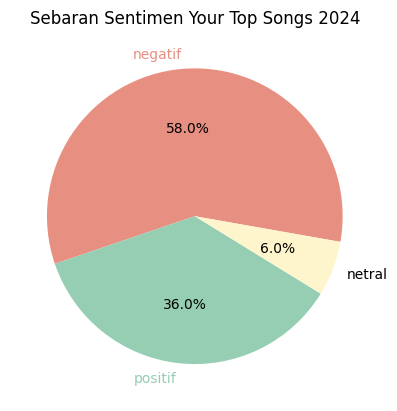

In [92]:
fig, ax = plt.subplots()

patches, texts, autotexts  = ax.pie(sentiment_count['count'], labels = sentiment_count['sentiment'],
                                    autopct='%1.1f%%',colors=['#E78F81', '#96CEB4', '#FFF5CD'],
                                    startangle=-10)
[text.set_color('black') for text in texts]
texts[0].set_color('#E78F81')
texts[1].set_color('#96CEB4')
texts[2].set_color('black')
[autotext.set_color('black') for autotext in autotexts]
plt.title('Sebaran Sentimen Your Top Songs 2024')
plt.show()

In [93]:
df_sentiment

,artist,song_title,album,genres,lyrics,clean_lyrics,token,sentiment,score
0,Fstvlst,Gas,Fstvlst II,"indonesian indie, indonesian indie rock, yogya...","Mengingat bagaimana ini bermula, disaat sudah ...",saat jalan berangkat semenjak pagi merah tel b...,"[saat, jalan, berangkat, semenjak, pagi, merah...",positif,0.928526
1,Hindia,Kita Ke Sana,Lagipula Hidup Akan Berakhir,indonesian pop,[Lirik “Kita ke Sana”][Verse 1]Rayakan hari in...,raya besok sisa sengsara pulang kau teman diri...,"[raya, besok, sisa, sengsara, pulang, kau, tem...",negatif,0.995178
2,The Adams,Hanya Kau,V2.05,"indonesian alternative rock, indonesian indie,...",[Verse 1]Ku berjalan tiada henti'Tuk memastika...,ku jalan tiada henti tuk cari baik hati peduli...,"[ku, jalan, tiada, henti, tuk, cari, baik, hat...",positif,0.997155
3,Morfem,Megah Diterima,Megah Diterima,"indonesian indie, indonesian indie rock, indon...",Hujan mereda Ketika dia Percik air membumi Der...,hujan reda percik air bumi derap langkah kaki ...,"[hujan, reda, percik, air, bumi, derap, langka...",positif,0.945995
4,Perunggu,33x,Memorandum,"indonesian indie, indonesian indie rock","[Lirik ""33x""][Verse 1]Risalah terikatnya, bati...",x risalah ikat batin raga kunci sang maha daya...,"[x, risalah, ikat, batin, raga, kunci, sang, m...",negatif,0.990945
...,...,...,...,...,...,...,...,...,...
95,The Adams,Masa-Masa,Agterplaas,"indonesian alternative rock, indonesian indie,...","Lirik ""Masa-Masa""[Verse 1]Kau selalu ada Untuk...",kau tertawa lupa salah ikut muda jiwa remaja s...,"[kau, tertawa, lupa, salah, ikut, muda, jiwa, ...",positif,0.881754
96,Hindia,Aku Rasa Kita Selamanya,Aku Rasa Kita Selamanya,indonesian pop,"[Lirik ""Aku Rasa Kita Selamanya""][Chorus]Aku r...",abadi nyala pegang nyata andal kawan kau ingat...,"[abadi, nyala, pegang, nyata, andal, kawan, ka...",negatif,0.991469
97,Ali,"Dance, Habibi",Malaka,indonesian indie,"[Intro]Ey, Holm, is this you, yeah?Linka med J...",ey holm linka med jack vi whippar en till vers...,"[ey, holm, linka, med, jack, vi, whippar, en, ...",netral,0.957229
98,Jenny,Matimuda,Manifesto,"indonesian indie, indonesian indie rock, yogya...",Berbaris-baris dan bersiaplah Bersiap-siap sia...,bar baris siap siap sambut sambut istilah univ...,"[bar, baris, siap, siap, sambut, sambut, istil...",negatif,0.994130


In [113]:
df_positif = df_sentiment[df_sentiment['sentiment'] == 'positif']
df_positif[['artist', 'song_title', 'clean_lyrics', 'score']].sort_values(by='score', ascending = False).head()

,artist,song_title,clean_lyrics,score
69,Petra Sihombing,Istimewa,erti luluh hati manja hati lagu ku nyanyi untu...,0.997645
2,The Adams,Hanya Kau,ku jalan tiada henti tuk cari baik hati peduli...,0.997155
47,Putra Timur,Nona,nona nona kau batas bumi haa nona dekat dekap ...,0.996940
44,The Adams,Jikalau,nanti ku bahagia diri ku harap dikau sabar tun...,0.996023
24,Perunggu,Ini Abadi,abadi dihentak sunyi geram gusar gerayang kupi...,0.995784


In [95]:
#Create a new dataframe of all the  words used in lyrics and its decades

#list used to store the information
set_words_pos = []
df_positif = df_positif.reset_index(drop=True)

#Iterate trought each word and decade and stores them into the new lists
for i in df_positif.index:
    for word in df_positif['token'].iloc[i]:
        set_words_pos.append(word)

words_pos = pd.DataFrame({'words':set_words_pos})

wordcount_pos = words_pos['words'].value_counts()
wordcount_pos

wordcount_pos = wordcount_pos.to_frame().reset_index()  # Convert Series to DataFrame and reset index
wordcount_pos.columns = ['words', 'count']  # Rename columns for clarity
wordcount_pos = wordcount_pos.head(5)
wordcount_pos

,words,count
0,kau,60
1,ku,40
2,green,22
3,hati,20
4,cinta,20


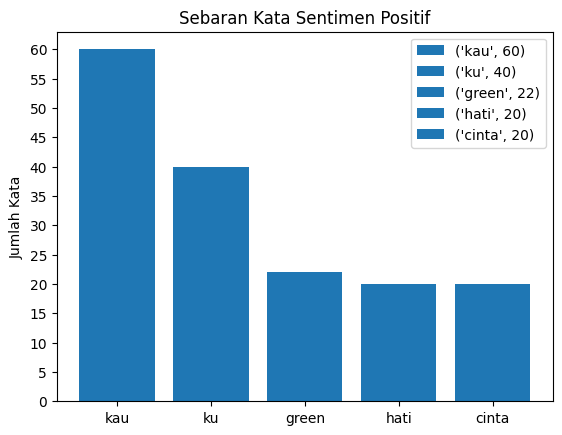

In [96]:
fig, ax = plt.subplots()
#colors = ['#3282B8', '#E1EACD', '#FFD65A', '#DA498D', '#CBA35C']
bar_labels = list(zip(wordcount_pos['words'], wordcount_pos['count']))
plt.yticks(np.arange(0,100,5))

ax.bar(wordcount_pos['words'], wordcount_pos['count'], label=bar_labels)

ax.set_ylabel('Jumlah Kata')
ax.set_title('Sebaran Kata Sentimen Positif')
ax.legend()

plt.show()

In [112]:
df_negatif = df_sentiment[df_sentiment['sentiment'] == 'negatif']
df_negatif[['artist', 'song_title', 'clean_lyrics', 'score']].sort_values(by='score', ascending = False).head()

,artist,song_title,clean_lyrics,score
94,Fstvlst,Hari Terakhir Peradaban,adab hari wanita budak kelamin peluk agama tuh...,0.995854
35,.Feast,Tarian Penghancur Raya,tari hancur raya mata peluh asin perlahan hapu...,0.995832
28,The Adams,Suara,main gitar musik tular bentang irama telinga d...,0.995771
55,rumahsakit,Pop Kinetik,bunuh bunuh kau silah serang hantam pada andai...,0.995769
56,Morfem,Rayakan Pemenang,debu lekat tshirt embun basah kepala lingkar k...,0.995733


In [98]:
#Create a new dataframe of all the  words used in lyrics and its decades

#list used to store the information
set_words_neg = []
df_negatif = df_negatif.reset_index(drop=True)

#Iterate trought each word and decade and stores them into the new lists
for i in df_negatif.index:
    for word in df_negatif['token'].iloc[i]:
        set_words_neg.append(word)

words_neg = pd.DataFrame({'words':set_words_neg})

wordcount_neg = words_neg['words'].value_counts()
wordcount_neg

wordcount_neg = wordcount_neg.to_frame().reset_index()  # Convert Series to DataFrame and reset index
wordcount_neg.columns = ['words', 'count']  # Rename columns for clarity
wordcount_neg = wordcount_neg.head(5)
wordcount_neg

,words,count
0,kau,141
1,ku,43
2,diri,33
3,hidup,30
4,hati,25


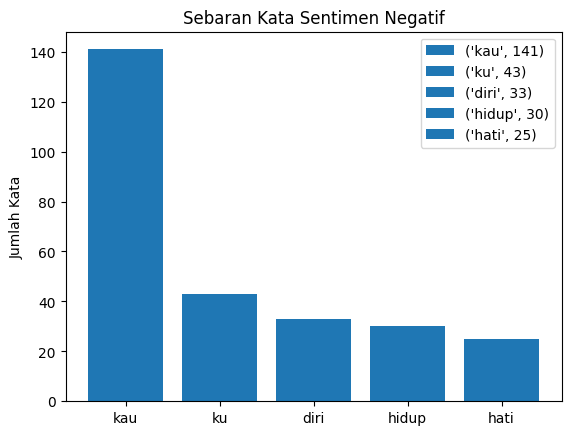

In [99]:
fig, ax = plt.subplots()
#colors = ['#3282B8', '#E1EACD', '#FFD65A', '#DA498D', '#CBA35C']
bar_labels = list(zip(wordcount_neg['words'], wordcount_neg['count']))
plt.yticks(np.arange(0,200,20))

ax.bar(wordcount_neg['words'], wordcount_neg['count'], label=bar_labels)

ax.set_ylabel('Jumlah Kata')
ax.set_title('Sebaran Kata Sentimen Negatif')
ax.legend()

plt.show()

In [126]:
df_netral = df_sentiment[df_sentiment['sentiment'] == 'netral']
df_netral[['artist', 'song_title', 'clean_lyrics', 'score']].sort_values(by='score', ascending = False)

,artist,song_title,clean_lyrics,score
42,Rafi Sudirman,That Somebody,play games like wait really care bout lover un...,0.976475
97,Ali,"Dance, Habibi",ey holm linka med jack vi whippar en till vers...,0.957229
82,Lor,Your Way,knees surrendering surrendering find lord draw...,0.924067
90,Yahya,keepyousafe,show love promise one side tell truth love dif...,0.659755
60,Lor,A Normal Teenager,scorethe epic hero mono myth still concept imp...,0.620839
86,Lor,Out Of My League,comes like good medicine every step takes bloo...,0.476002


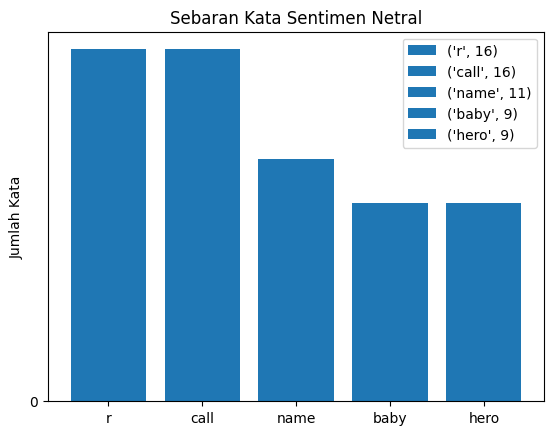

In [125]:
fig, ax = plt.subplots()
#colors = ['#3282B8', '#E1EACD', '#FFD65A', '#DA498D', '#CBA35C']
bar_labels = list(zip(wordcount_net['words'], wordcount_net['count']))
plt.yticks(np.arange(0,200,20))

ax.bar(wordcount_net['words'], wordcount_net['count'], label=bar_labels)

ax.set_ylabel('Jumlah Kata')
ax.set_title('Sebaran Kata Sentimen Netral')
ax.legend()

plt.show()

In [101]:
#Create a new dataframe of all the  words used in lyrics and its decades

#list used to store the information
set_words_net = []
df_netral = df_netral.reset_index(drop=True)

#Iterate trought each word and decade and stores them into the new lists
for i in df_netral.index:
    for word in df_netral['token'].iloc[i]:
        set_words_net.append(word)

words_net = pd.DataFrame({'words':set_words_net})

wordcount_net = words_net['words'].value_counts()
wordcount_net

wordcount_net = wordcount_net.to_frame().reset_index()  # Convert Series to DataFrame and reset index
wordcount_net.columns = ['words', 'count']  # Rename columns for clarity
wordcount_net = wordcount_net.head(5)
wordcount_net

,words,count
0,r,16
1,call,16
2,name,11
3,baby,9
4,hero,9


In [102]:
print("Jumlah kata positif: ",wordcount_pos['count'].sum())
print("Jumlah kata negatif: ",wordcount_neg['count'].sum())
print("Jumlah kata netral: ",wordcount_net['count'].sum())

Jumlah kata positif:  162
Jumlah kata negatif:  272
Jumlah kata netral:  61


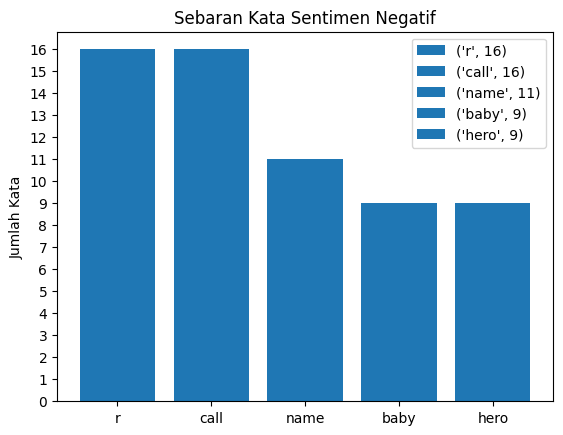

In [103]:
fig, ax = plt.subplots()
#colors = ['#3282B8', '#E1EACD', '#FFD65A', '#DA498D', '#CBA35C']
bar_labels = list(zip(wordcount_net['words'], wordcount_net['count']))
plt.yticks(np.arange(0,20))

ax.bar(wordcount_net['words'], wordcount_net['count'], label=bar_labels)

ax.set_ylabel('Jumlah Kata')
ax.set_title('Sebaran Kata Sentimen Negatif')
ax.legend()

plt.show()

In [104]:
df_sentiment.to_csv('predicted_sentiment_topsongs2024_cleanlyrics_cleaningver_noenglish.csv')

In [105]:
!pip install wordcloud

(-0.5, 799.5, 599.5, -0.5)

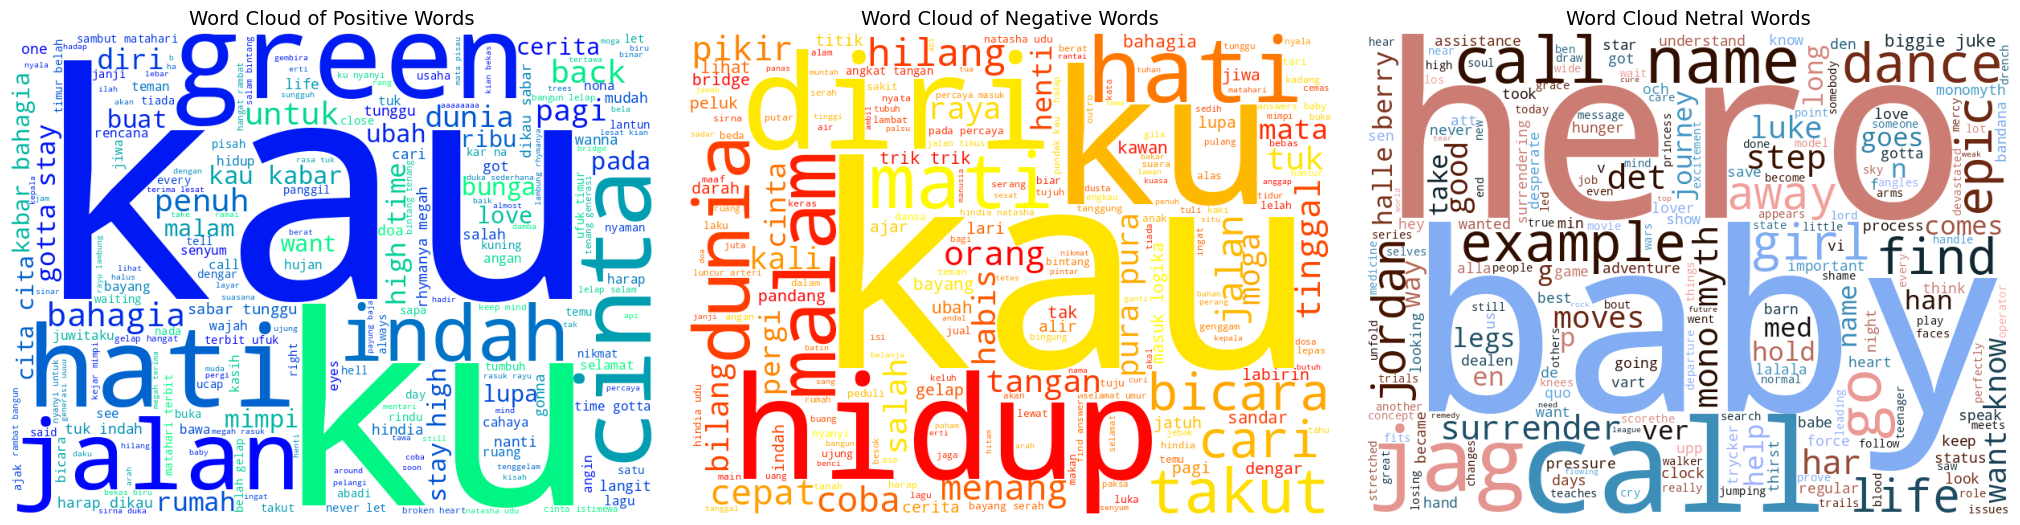

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

pos_lyrics = ' '.join(df_positif['clean_lyrics'])
neg_lyrics = ' '.join(df_negatif['clean_lyrics'])
net_lyrics = ' '.join(df_netral['clean_lyrics'])


fig, ax = plt.subplots(1, 3,figsize = (20, 10))

wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'white', colormap = 'winter'
                               , min_font_size = 10).generate(pos_lyrics)

ax[0].set_title('Word Cloud of Positive Words', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'white', colormap = 'autumn'
                               , min_font_size = 10).generate(neg_lyrics)
ax[1].set_title('Word Cloud of Negative Words', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

wordcloud_netral = WordCloud(width = 800, height = 600, background_color = 'white', colormap ='berlin'
                               , min_font_size = 10).generate(net_lyrics)
ax[2].set_title('Word Cloud Netral Words', fontsize = 14)
ax[2].grid(False)
ax[2].imshow((wordcloud_netral))
fig.tight_layout(pad=0)
ax[2].axis('off')
# Display the WordCloud


### Common Words

In [116]:
#Create a new dataframe of all the  words used in lyrics and its decades

#list used to store the information
set_words = []
set_artist = []
set_genre =[]

#Iterate trought each word and decade and stores them into the new lists
for i in df1.index:
    for word in df_sentiment['token'].iloc[i]:
        set_words.append(word)
        set_artist.append(df1['artist'].iloc[i])
        set_genre.append(df1['genres'].iloc[i])

#create the new data frame  with the information of words and decade lists
words_df = pd.DataFrame({'words':set_words, 'artist':set_artist, 'genre':set_genre})
words_df.head()

,words,artist,genre
0,saat,Fstvlst,"indonesian indie, indonesian indie rock, yogya..."
1,jalan,Fstvlst,"indonesian indie, indonesian indie rock, yogya..."
2,berangkat,Fstvlst,"indonesian indie, indonesian indie rock, yogya..."
3,semenjak,Fstvlst,"indonesian indie, indonesian indie rock, yogya..."
4,pagi,Fstvlst,"indonesian indie, indonesian indie rock, yogya..."


In [117]:
wordcount = words_df['words'].value_counts()
wordcount

,count
words,
kau,201
ku,83
hati,45
diri,43
jalan,35
...,...
impending,1
traces,1
erased,1


In [118]:
wordcount_df = wordcount.to_frame().reset_index()  # Convert Series to DataFrame and reset index
wordcount_df.columns = ['words', 'count']  # Rename columns for clarity
wordcount_df = wordcount_df.head(10)
wordcount_df

,words,count
0,kau,201
1,ku,83
2,hati,45
3,diri,43
4,jalan,35
5,hidup,35
6,malam,31
7,bahagia,30
8,cinta,30
9,dunia,29


In [123]:
import re
from IPython.display import Markdown  # Import the Markdown function

# Get the list of keywords from the 'words' column of wordcount_df
keywords = wordcount_df['words'].head().tolist()

for sentence in df_sentiment['clean_lyrics']:
    for keyword in keywords:  # Iterate through each keyword
        if 'hati' in sentence:
          for line in sentence.split("\n"):
              print("Keyword: ", keyword)
              # Search for keyword
              if re.search(f"\\b{'hati'}\\b", line):
                  # Replace keyword with bolded keyword
                  line_with_bolding = re.sub(f"\\b{'hati'}\\b", f"**{'hati'}**", line, flags=re.IGNORECASE)
                  # Display line with bolded keyword
                  display(Markdown(line_with_bolding))

Keyword:  kau


ku jalan tiada henti tuk cari baik **hati** peduli peduli ragu **hati** kau ubah tuk indah kau rasa tuk indah mudah tuk cari mati asa **hati** kau ubah tuk indah kau rasa tuk indah kau ubah tuk indah kau rasa tuk indah

Keyword:  ku


ku jalan tiada henti tuk cari baik **hati** peduli peduli ragu **hati** kau ubah tuk indah kau rasa tuk indah mudah tuk cari mati asa **hati** kau ubah tuk indah kau rasa tuk indah kau ubah tuk indah kau rasa tuk indah

Keyword:  hati


ku jalan tiada henti tuk cari baik **hati** peduli peduli ragu **hati** kau ubah tuk indah kau rasa tuk indah mudah tuk cari mati asa **hati** kau ubah tuk indah kau rasa tuk indah kau ubah tuk indah kau rasa tuk indah

Keyword:  diri


ku jalan tiada henti tuk cari baik **hati** peduli peduli ragu **hati** kau ubah tuk indah kau rasa tuk indah mudah tuk cari mati asa **hati** kau ubah tuk indah kau rasa tuk indah kau ubah tuk indah kau rasa tuk indah

Keyword:  jalan


ku jalan tiada henti tuk cari baik **hati** peduli peduli ragu **hati** kau ubah tuk indah kau rasa tuk indah mudah tuk cari mati asa **hati** kau ubah tuk indah kau rasa tuk indah kau ubah tuk indah kau rasa tuk indah

Keyword:  kau


x risalah ikat batin raga kunci sang maha daya kendali ambil alih kau keluh dengung sumbang ganggu buka visi kau urut pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban rotasi pandang ambil sudut baru kau coba lihat mata kelak kau bawa situ posisi hela kesah pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban kau henti kuras ujung rencana jalan niat simpan tegar **hati** sembilan kau rus cari

Keyword:  ku


x risalah ikat batin raga kunci sang maha daya kendali ambil alih kau keluh dengung sumbang ganggu buka visi kau urut pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban rotasi pandang ambil sudut baru kau coba lihat mata kelak kau bawa situ posisi hela kesah pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban kau henti kuras ujung rencana jalan niat simpan tegar **hati** sembilan kau rus cari

Keyword:  hati


x risalah ikat batin raga kunci sang maha daya kendali ambil alih kau keluh dengung sumbang ganggu buka visi kau urut pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban rotasi pandang ambil sudut baru kau coba lihat mata kelak kau bawa situ posisi hela kesah pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban kau henti kuras ujung rencana jalan niat simpan tegar **hati** sembilan kau rus cari

Keyword:  diri


x risalah ikat batin raga kunci sang maha daya kendali ambil alih kau keluh dengung sumbang ganggu buka visi kau urut pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban rotasi pandang ambil sudut baru kau coba lihat mata kelak kau bawa situ posisi hela kesah pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban kau henti kuras ujung rencana jalan niat simpan tegar **hati** sembilan kau rus cari

Keyword:  jalan


x risalah ikat batin raga kunci sang maha daya kendali ambil alih kau keluh dengung sumbang ganggu buka visi kau urut pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban rotasi pandang ambil sudut baru kau coba lihat mata kelak kau bawa situ posisi hela kesah pusar nirfungsi peta titik tuju patri lamban tabu kadang kau butuh sandar hibah beban kau henti kuras ujung rencana jalan niat simpan tegar **hati** sembilan kau rus cari

Keyword:  kau


dansa karir besok coba kau izin pulang cepat bilang sakit lusa coba izin lambat bilang kau celaka habis cuti resign know scared totally fine kau mesin assembly line lihat promo libur babe sign tahu kalimat ujung mulut kau laku umur hidup laku kau **hati** gerak kau larang hidup kau bebas arang makna laku kau **hati** gerak kau larang lagipula hidup laku kau

Keyword:  ku


dansa karir besok coba kau izin pulang cepat bilang sakit lusa coba izin lambat bilang kau celaka habis cuti resign know scared totally fine kau mesin assembly line lihat promo libur babe sign tahu kalimat ujung mulut kau laku umur hidup laku kau **hati** gerak kau larang hidup kau bebas arang makna laku kau **hati** gerak kau larang lagipula hidup laku kau

Keyword:  hati


dansa karir besok coba kau izin pulang cepat bilang sakit lusa coba izin lambat bilang kau celaka habis cuti resign know scared totally fine kau mesin assembly line lihat promo libur babe sign tahu kalimat ujung mulut kau laku umur hidup laku kau **hati** gerak kau larang hidup kau bebas arang makna laku kau **hati** gerak kau larang lagipula hidup laku kau

Keyword:  diri


dansa karir besok coba kau izin pulang cepat bilang sakit lusa coba izin lambat bilang kau celaka habis cuti resign know scared totally fine kau mesin assembly line lihat promo libur babe sign tahu kalimat ujung mulut kau laku umur hidup laku kau **hati** gerak kau larang hidup kau bebas arang makna laku kau **hati** gerak kau larang lagipula hidup laku kau

Keyword:  jalan


dansa karir besok coba kau izin pulang cepat bilang sakit lusa coba izin lambat bilang kau celaka habis cuti resign know scared totally fine kau mesin assembly line lihat promo libur babe sign tahu kalimat ujung mulut kau laku umur hidup laku kau **hati** gerak kau larang hidup kau bebas arang makna laku kau **hati** gerak kau larang lagipula hidup laku kau

Keyword:  kau


dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup **hati** **hati** pilih racun **hati** **hati** **hati** dur dehidrasi mata air semu dehidrasi paksa erti

Keyword:  ku


dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup **hati** **hati** pilih racun **hati** **hati** **hati** dur dehidrasi mata air semu dehidrasi paksa erti

Keyword:  hati


dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup **hati** **hati** pilih racun **hati** **hati** **hati** dur dehidrasi mata air semu dehidrasi paksa erti

Keyword:  diri


dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup **hati** **hati** pilih racun **hati** **hati** **hati** dur dehidrasi mata air semu dehidrasi paksa erti

Keyword:  jalan


dehidrasi lihat kebun penuh ratus pesan whats app gebu pura pura lupa balas karya nihil bcamemaksa wawancara ku tak sapa akan sahabat resah air keruh siram kau sentuh lepas diri sih lingkup racun alir darah lepas diri sih lingkup racun suara hidup **hati** **hati** pilih racun **hati** **hati** **hati** dur dehidrasi mata air semu dehidrasi paksa erti

Keyword:  kau


abadi dihentak sunyi geram gusar gerayang kuping bungkam janji sumbang tarik sejuk wangi sisa baju hangat kali bicara besok lihat sudut bandung peluk dingin hangat lengkap lapis selimut dekap nadi alir seru **hati** muara kabar mimpi cukup lembur gambir senin pagi lanjut taksi tenang abadi

Keyword:  ku


abadi dihentak sunyi geram gusar gerayang kuping bungkam janji sumbang tarik sejuk wangi sisa baju hangat kali bicara besok lihat sudut bandung peluk dingin hangat lengkap lapis selimut dekap nadi alir seru **hati** muara kabar mimpi cukup lembur gambir senin pagi lanjut taksi tenang abadi

Keyword:  hati


abadi dihentak sunyi geram gusar gerayang kuping bungkam janji sumbang tarik sejuk wangi sisa baju hangat kali bicara besok lihat sudut bandung peluk dingin hangat lengkap lapis selimut dekap nadi alir seru **hati** muara kabar mimpi cukup lembur gambir senin pagi lanjut taksi tenang abadi

Keyword:  diri


abadi dihentak sunyi geram gusar gerayang kuping bungkam janji sumbang tarik sejuk wangi sisa baju hangat kali bicara besok lihat sudut bandung peluk dingin hangat lengkap lapis selimut dekap nadi alir seru **hati** muara kabar mimpi cukup lembur gambir senin pagi lanjut taksi tenang abadi

Keyword:  jalan


abadi dihentak sunyi geram gusar gerayang kuping bungkam janji sumbang tarik sejuk wangi sisa baju hangat kali bicara besok lihat sudut bandung peluk dingin hangat lengkap lapis selimut dekap nadi alir seru **hati** muara kabar mimpi cukup lembur gambir senin pagi lanjut taksi tenang abadi

Keyword:  kau


bayang serah kau bayang meni lucu anak anak ibu manis kau bayang abang madu hidup tunggu pulang tur puluh bayang serah tantang ayah dunia hadap lewat ikut nikmat panas global beda agama hadap lewat bayang serah bayang serah kau bayang langit jakarta cerah kau darat pulang pandang tutup polusi kau bayang percaya istana taruh milik **hati** kau bayang takut berita takut diri ada takut mimpi lumayan gila berat besok tangan

Keyword:  ku


bayang serah kau bayang meni lucu anak anak ibu manis kau bayang abang madu hidup tunggu pulang tur puluh bayang serah tantang ayah dunia hadap lewat ikut nikmat panas global beda agama hadap lewat bayang serah bayang serah kau bayang langit jakarta cerah kau darat pulang pandang tutup polusi kau bayang percaya istana taruh milik **hati** kau bayang takut berita takut diri ada takut mimpi lumayan gila berat besok tangan

Keyword:  hati


bayang serah kau bayang meni lucu anak anak ibu manis kau bayang abang madu hidup tunggu pulang tur puluh bayang serah tantang ayah dunia hadap lewat ikut nikmat panas global beda agama hadap lewat bayang serah bayang serah kau bayang langit jakarta cerah kau darat pulang pandang tutup polusi kau bayang percaya istana taruh milik **hati** kau bayang takut berita takut diri ada takut mimpi lumayan gila berat besok tangan

Keyword:  diri


bayang serah kau bayang meni lucu anak anak ibu manis kau bayang abang madu hidup tunggu pulang tur puluh bayang serah tantang ayah dunia hadap lewat ikut nikmat panas global beda agama hadap lewat bayang serah bayang serah kau bayang langit jakarta cerah kau darat pulang pandang tutup polusi kau bayang percaya istana taruh milik **hati** kau bayang takut berita takut diri ada takut mimpi lumayan gila berat besok tangan

Keyword:  jalan


bayang serah kau bayang meni lucu anak anak ibu manis kau bayang abang madu hidup tunggu pulang tur puluh bayang serah tantang ayah dunia hadap lewat ikut nikmat panas global beda agama hadap lewat bayang serah bayang serah kau bayang langit jakarta cerah kau darat pulang pandang tutup polusi kau bayang percaya istana taruh milik **hati** kau bayang takut berita takut diri ada takut mimpi lumayan gila berat besok tangan

Keyword:  kau


tarot nama tahan ruang hening suara tahan geming canda biasa celaka nyata diam daya bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku ku bridge hidup sempat moga kau keras kepala sempat ubah yakin nyawa taut khatam coba tertawa ramal bintang kartu tarot orang pintar baca nasib bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku bridge ku tertawa ramal bintang kartu tarot orang pintar baca nasib outro pada percaya masuk logika pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya masuk logika

Keyword:  ku


tarot nama tahan ruang hening suara tahan geming canda biasa celaka nyata diam daya bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku ku bridge hidup sempat moga kau keras kepala sempat ubah yakin nyawa taut khatam coba tertawa ramal bintang kartu tarot orang pintar baca nasib bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku bridge ku tertawa ramal bintang kartu tarot orang pintar baca nasib outro pada percaya masuk logika pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya masuk logika

Keyword:  hati


tarot nama tahan ruang hening suara tahan geming canda biasa celaka nyata diam daya bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku ku bridge hidup sempat moga kau keras kepala sempat ubah yakin nyawa taut khatam coba tertawa ramal bintang kartu tarot orang pintar baca nasib bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku bridge ku tertawa ramal bintang kartu tarot orang pintar baca nasib outro pada percaya masuk logika pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya masuk logika

Keyword:  diri


tarot nama tahan ruang hening suara tahan geming canda biasa celaka nyata diam daya bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku ku bridge hidup sempat moga kau keras kepala sempat ubah yakin nyawa taut khatam coba tertawa ramal bintang kartu tarot orang pintar baca nasib bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku bridge ku tertawa ramal bintang kartu tarot orang pintar baca nasib outro pada percaya masuk logika pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya masuk logika

Keyword:  jalan


tarot nama tahan ruang hening suara tahan geming canda biasa celaka nyata diam daya bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku ku bridge hidup sempat moga kau keras kepala sempat ubah yakin nyawa taut khatam coba tertawa ramal bintang kartu tarot orang pintar baca nasib bingung ku pergi bingung tuk bagi derita buruk **hati** **hati** jatuh luka niscaya tanggung dengan ku bridge ku tertawa ramal bintang kartu tarot orang pintar baca nasib outro pada percaya masuk logika pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya pada percaya masuk logika masuk logika pada percaya masuk logika

Keyword:  kau


kali tidur tenang renggang pikir esok tubuh patah **hati** gantung gaji lomba asri kais validasi hadir akan mahir tenang diri pinggir dunia adil gagal angkat minum sedih post sia sia putus asa rekam pedih

Keyword:  ku


kali tidur tenang renggang pikir esok tubuh patah **hati** gantung gaji lomba asri kais validasi hadir akan mahir tenang diri pinggir dunia adil gagal angkat minum sedih post sia sia putus asa rekam pedih

Keyword:  hati


kali tidur tenang renggang pikir esok tubuh patah **hati** gantung gaji lomba asri kais validasi hadir akan mahir tenang diri pinggir dunia adil gagal angkat minum sedih post sia sia putus asa rekam pedih

Keyword:  diri


kali tidur tenang renggang pikir esok tubuh patah **hati** gantung gaji lomba asri kais validasi hadir akan mahir tenang diri pinggir dunia adil gagal angkat minum sedih post sia sia putus asa rekam pedih

Keyword:  jalan


kali tidur tenang renggang pikir esok tubuh patah **hati** gantung gaji lomba asri kais validasi hadir akan mahir tenang diri pinggir dunia adil gagal angkat minum sedih post sia sia putus asa rekam pedih

Keyword:  kau


juwitaku sapa pagi puja hari dikau sang mentari rang kalbu kirim bunga tanda rindu kicau burung sadar mimpi mimpi buruk ucap selamat pagi juwitaku senyum puja hilang resah cipta damai dunia enyah kau duka lara sambut tangan ajak luas angkasa mentari senyum pelangi hias angkasa tawa cerah **hati** bridge kasih pejam mata pelita **hati** tak ragu **hati** tuk cium tanda cinta pada pudar kasih bridge pergi kau duka **hati** lara ilah senyum indah hapus gundah malam gelap gulita indah pagi rang dunia surga jiwa outro juwitaku sapa pagi juwitaku senyum **hati** **hati** jiwa jiwa satu selamat pagi kasih selamat pagi juwitaku

Keyword:  ku


juwitaku sapa pagi puja hari dikau sang mentari rang kalbu kirim bunga tanda rindu kicau burung sadar mimpi mimpi buruk ucap selamat pagi juwitaku senyum puja hilang resah cipta damai dunia enyah kau duka lara sambut tangan ajak luas angkasa mentari senyum pelangi hias angkasa tawa cerah **hati** bridge kasih pejam mata pelita **hati** tak ragu **hati** tuk cium tanda cinta pada pudar kasih bridge pergi kau duka **hati** lara ilah senyum indah hapus gundah malam gelap gulita indah pagi rang dunia surga jiwa outro juwitaku sapa pagi juwitaku senyum **hati** **hati** jiwa jiwa satu selamat pagi kasih selamat pagi juwitaku

Keyword:  hati


juwitaku sapa pagi puja hari dikau sang mentari rang kalbu kirim bunga tanda rindu kicau burung sadar mimpi mimpi buruk ucap selamat pagi juwitaku senyum puja hilang resah cipta damai dunia enyah kau duka lara sambut tangan ajak luas angkasa mentari senyum pelangi hias angkasa tawa cerah **hati** bridge kasih pejam mata pelita **hati** tak ragu **hati** tuk cium tanda cinta pada pudar kasih bridge pergi kau duka **hati** lara ilah senyum indah hapus gundah malam gelap gulita indah pagi rang dunia surga jiwa outro juwitaku sapa pagi juwitaku senyum **hati** **hati** jiwa jiwa satu selamat pagi kasih selamat pagi juwitaku

Keyword:  diri


juwitaku sapa pagi puja hari dikau sang mentari rang kalbu kirim bunga tanda rindu kicau burung sadar mimpi mimpi buruk ucap selamat pagi juwitaku senyum puja hilang resah cipta damai dunia enyah kau duka lara sambut tangan ajak luas angkasa mentari senyum pelangi hias angkasa tawa cerah **hati** bridge kasih pejam mata pelita **hati** tak ragu **hati** tuk cium tanda cinta pada pudar kasih bridge pergi kau duka **hati** lara ilah senyum indah hapus gundah malam gelap gulita indah pagi rang dunia surga jiwa outro juwitaku sapa pagi juwitaku senyum **hati** **hati** jiwa jiwa satu selamat pagi kasih selamat pagi juwitaku

Keyword:  jalan


juwitaku sapa pagi puja hari dikau sang mentari rang kalbu kirim bunga tanda rindu kicau burung sadar mimpi mimpi buruk ucap selamat pagi juwitaku senyum puja hilang resah cipta damai dunia enyah kau duka lara sambut tangan ajak luas angkasa mentari senyum pelangi hias angkasa tawa cerah **hati** bridge kasih pejam mata pelita **hati** tak ragu **hati** tuk cium tanda cinta pada pudar kasih bridge pergi kau duka **hati** lara ilah senyum indah hapus gundah malam gelap gulita indah pagi rang dunia surga jiwa outro juwitaku sapa pagi juwitaku senyum **hati** **hati** jiwa jiwa satu selamat pagi kasih selamat pagi juwitaku

Keyword:  kau


biang lara sepi tinggi **hati** kali bilang sembunyi benci kian lara kian resap iris lapis janji henti dalih coba tatih tapak antusias sepi tinggi **hati** kali bilang sembunyi benci letih henti palsu senyum raya perih biang lara putar pelan poros sempurna kunjung geming

Keyword:  ku


biang lara sepi tinggi **hati** kali bilang sembunyi benci kian lara kian resap iris lapis janji henti dalih coba tatih tapak antusias sepi tinggi **hati** kali bilang sembunyi benci letih henti palsu senyum raya perih biang lara putar pelan poros sempurna kunjung geming

Keyword:  hati


biang lara sepi tinggi **hati** kali bilang sembunyi benci kian lara kian resap iris lapis janji henti dalih coba tatih tapak antusias sepi tinggi **hati** kali bilang sembunyi benci letih henti palsu senyum raya perih biang lara putar pelan poros sempurna kunjung geming

Keyword:  diri


biang lara sepi tinggi **hati** kali bilang sembunyi benci kian lara kian resap iris lapis janji henti dalih coba tatih tapak antusias sepi tinggi **hati** kali bilang sembunyi benci letih henti palsu senyum raya perih biang lara putar pelan poros sempurna kunjung geming

Keyword:  jalan


biang lara sepi tinggi **hati** kali bilang sembunyi benci kian lara kian resap iris lapis janji henti dalih coba tatih tapak antusias sepi tinggi **hati** kali bilang sembunyi benci letih henti palsu senyum raya perih biang lara putar pelan poros sempurna kunjung geming

Keyword:  kau


nanti ku bahagia diri ku harap dikau sabar tunggu ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada interlude ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu janji untuk lupa kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada bridge pada outro ario nanti bahagia tunggu saleh nanti ku bahagia diri harap dikau sabar tunggu arfan nanti ku bahagia diri harap dikau sabar tunggu gigih nanti bahagia tunggu retiara nanti ku bahagia diri harap dikau sabar ku untuk

Keyword:  ku


nanti ku bahagia diri ku harap dikau sabar tunggu ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada interlude ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu janji untuk lupa kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada bridge pada outro ario nanti bahagia tunggu saleh nanti ku bahagia diri harap dikau sabar tunggu arfan nanti ku bahagia diri harap dikau sabar tunggu gigih nanti bahagia tunggu retiara nanti ku bahagia diri harap dikau sabar ku untuk

Keyword:  hati


nanti ku bahagia diri ku harap dikau sabar tunggu ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada interlude ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu janji untuk lupa kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada bridge pada outro ario nanti bahagia tunggu saleh nanti ku bahagia diri harap dikau sabar tunggu arfan nanti ku bahagia diri harap dikau sabar tunggu gigih nanti bahagia tunggu retiara nanti ku bahagia diri harap dikau sabar ku untuk

Keyword:  diri


nanti ku bahagia diri ku harap dikau sabar tunggu ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada interlude ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu janji untuk lupa kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada bridge pada outro ario nanti bahagia tunggu saleh nanti ku bahagia diri harap dikau sabar tunggu arfan nanti ku bahagia diri harap dikau sabar tunggu gigih nanti bahagia tunggu retiara nanti ku bahagia diri harap dikau sabar ku untuk

Keyword:  jalan


nanti ku bahagia diri ku harap dikau sabar tunggu ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada interlude ilah daku tuk wujud janji untuk ku lupa ku harap dikau sabar tunggu janji untuk lupa kau sabar tunggu untai ucap untuk indah cinta pada kau **hati** pada bridge pada outro ario nanti bahagia tunggu saleh nanti ku bahagia diri harap dikau sabar tunggu arfan nanti ku bahagia diri harap dikau sabar tunggu gigih nanti bahagia tunggu retiara nanti ku bahagia diri harap dikau sabar ku untuk

Keyword:  kau


takut ubah natasha udu nanana nana nanana hindia udu alas ku suka orang dalam tumbuh kembang lahir kau alas hindia udu moga raih moga patah **hati** hindia udu baik kakak adik nyaman takut ubah mati belantara kejam tuntas curi **hati** rayhan noor hindia udu kau lindung diri peduli kau pergi tak mudah kau serah lelah jengah kali serah

Keyword:  ku


takut ubah natasha udu nanana nana nanana hindia udu alas ku suka orang dalam tumbuh kembang lahir kau alas hindia udu moga raih moga patah **hati** hindia udu baik kakak adik nyaman takut ubah mati belantara kejam tuntas curi **hati** rayhan noor hindia udu kau lindung diri peduli kau pergi tak mudah kau serah lelah jengah kali serah

Keyword:  hati


takut ubah natasha udu nanana nana nanana hindia udu alas ku suka orang dalam tumbuh kembang lahir kau alas hindia udu moga raih moga patah **hati** hindia udu baik kakak adik nyaman takut ubah mati belantara kejam tuntas curi **hati** rayhan noor hindia udu kau lindung diri peduli kau pergi tak mudah kau serah lelah jengah kali serah

Keyword:  diri


takut ubah natasha udu nanana nana nanana hindia udu alas ku suka orang dalam tumbuh kembang lahir kau alas hindia udu moga raih moga patah **hati** hindia udu baik kakak adik nyaman takut ubah mati belantara kejam tuntas curi **hati** rayhan noor hindia udu kau lindung diri peduli kau pergi tak mudah kau serah lelah jengah kali serah

Keyword:  jalan


takut ubah natasha udu nanana nana nanana hindia udu alas ku suka orang dalam tumbuh kembang lahir kau alas hindia udu moga raih moga patah **hati** hindia udu baik kakak adik nyaman takut ubah mati belantara kejam tuntas curi **hati** rayhan noor hindia udu kau lindung diri peduli kau pergi tak mudah kau serah lelah jengah kali serah

Keyword:  kau


kau bingung cakap takut salah bicara singgung kau linglung gundah cari jalan cair suasana diam hening patung kau habis nilai beda dua maaf ratus untuk usaha **hati** buka lebar lebar terkadang kau anggap pongah dunia pongah dunia menang seberang kau percaya cerna maaf ratus untuk usaha tuk maaf ratus untuk ku b rdoa **hati** buka lebar l bar ku doa **hati** buka

Keyword:  ku


kau bingung cakap takut salah bicara singgung kau linglung gundah cari jalan cair suasana diam hening patung kau habis nilai beda dua maaf ratus untuk usaha **hati** buka lebar lebar terkadang kau anggap pongah dunia pongah dunia menang seberang kau percaya cerna maaf ratus untuk usaha tuk maaf ratus untuk ku b rdoa **hati** buka lebar l bar ku doa **hati** buka

Keyword:  hati


kau bingung cakap takut salah bicara singgung kau linglung gundah cari jalan cair suasana diam hening patung kau habis nilai beda dua maaf ratus untuk usaha **hati** buka lebar lebar terkadang kau anggap pongah dunia pongah dunia menang seberang kau percaya cerna maaf ratus untuk usaha tuk maaf ratus untuk ku b rdoa **hati** buka lebar l bar ku doa **hati** buka

Keyword:  diri


kau bingung cakap takut salah bicara singgung kau linglung gundah cari jalan cair suasana diam hening patung kau habis nilai beda dua maaf ratus untuk usaha **hati** buka lebar lebar terkadang kau anggap pongah dunia pongah dunia menang seberang kau percaya cerna maaf ratus untuk usaha tuk maaf ratus untuk ku b rdoa **hati** buka lebar l bar ku doa **hati** buka

Keyword:  jalan


kau bingung cakap takut salah bicara singgung kau linglung gundah cari jalan cair suasana diam hening patung kau habis nilai beda dua maaf ratus untuk usaha **hati** buka lebar lebar terkadang kau anggap pongah dunia pongah dunia menang seberang kau percaya cerna maaf ratus untuk usaha tuk maaf ratus untuk ku b rdoa **hati** buka lebar l bar ku doa **hati** buka

Keyword:  kau


gelap malam jebak pikir karam alas henti geram malam lelah gelap kawan sekat sekat luka kau bisu gelap tanda daya tak jiwa penuh dusta biar biar jalan usah kau beda nyala kapar nyawa hilang tel ruang ruang **hati** nyala kekal angkuh lawan takut gelap pagi samar beda

Keyword:  ku


gelap malam jebak pikir karam alas henti geram malam lelah gelap kawan sekat sekat luka kau bisu gelap tanda daya tak jiwa penuh dusta biar biar jalan usah kau beda nyala kapar nyawa hilang tel ruang ruang **hati** nyala kekal angkuh lawan takut gelap pagi samar beda

Keyword:  hati


gelap malam jebak pikir karam alas henti geram malam lelah gelap kawan sekat sekat luka kau bisu gelap tanda daya tak jiwa penuh dusta biar biar jalan usah kau beda nyala kapar nyawa hilang tel ruang ruang **hati** nyala kekal angkuh lawan takut gelap pagi samar beda

Keyword:  diri


gelap malam jebak pikir karam alas henti geram malam lelah gelap kawan sekat sekat luka kau bisu gelap tanda daya tak jiwa penuh dusta biar biar jalan usah kau beda nyala kapar nyawa hilang tel ruang ruang **hati** nyala kekal angkuh lawan takut gelap pagi samar beda

Keyword:  jalan


gelap malam jebak pikir karam alas henti geram malam lelah gelap kawan sekat sekat luka kau bisu gelap tanda daya tak jiwa penuh dusta biar biar jalan usah kau beda nyala kapar nyawa hilang tel ruang ruang **hati** nyala kekal angkuh lawan takut gelap pagi samar beda

Keyword:  kau


erti luluh **hati** manja **hati** lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa diri baca pikir lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa lagu ku nyanyi untuk **hati** sepenuh sungguh tulus cinta istimewa buat istimewa manja lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa

Keyword:  ku


erti luluh **hati** manja **hati** lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa diri baca pikir lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa lagu ku nyanyi untuk **hati** sepenuh sungguh tulus cinta istimewa buat istimewa manja lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa

Keyword:  hati


erti luluh **hati** manja **hati** lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa diri baca pikir lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa lagu ku nyanyi untuk **hati** sepenuh sungguh tulus cinta istimewa buat istimewa manja lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa

Keyword:  diri


erti luluh **hati** manja **hati** lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa diri baca pikir lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa lagu ku nyanyi untuk **hati** sepenuh sungguh tulus cinta istimewa buat istimewa manja lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa

Keyword:  jalan


erti luluh **hati** manja **hati** lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa diri baca pikir lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa lagu ku nyanyi untuk **hati** sepenuh sungguh tulus cinta istimewa buat istimewa manja lagu ku nyanyi untuk dar lagu cinta ku cinta cinta istimewa

Keyword:  kau


cinta romantic echoes noh bilal selamat malam penuh cerita nan mesra aaaaaaaa bahagia tiada megah ayu wajah puan abai nestapa aaaaaaaa tenggelam rayu beri anjak aaaaaaaa tinggal cinta dengar kau tinggal daku remuk **hati** manusia cinta dengar kau kecewa maaf manusia

Keyword:  ku


cinta romantic echoes noh bilal selamat malam penuh cerita nan mesra aaaaaaaa bahagia tiada megah ayu wajah puan abai nestapa aaaaaaaa tenggelam rayu beri anjak aaaaaaaa tinggal cinta dengar kau tinggal daku remuk **hati** manusia cinta dengar kau kecewa maaf manusia

Keyword:  hati


cinta romantic echoes noh bilal selamat malam penuh cerita nan mesra aaaaaaaa bahagia tiada megah ayu wajah puan abai nestapa aaaaaaaa tenggelam rayu beri anjak aaaaaaaa tinggal cinta dengar kau tinggal daku remuk **hati** manusia cinta dengar kau kecewa maaf manusia

Keyword:  diri


cinta romantic echoes noh bilal selamat malam penuh cerita nan mesra aaaaaaaa bahagia tiada megah ayu wajah puan abai nestapa aaaaaaaa tenggelam rayu beri anjak aaaaaaaa tinggal cinta dengar kau tinggal daku remuk **hati** manusia cinta dengar kau kecewa maaf manusia

Keyword:  jalan


cinta romantic echoes noh bilal selamat malam penuh cerita nan mesra aaaaaaaa bahagia tiada megah ayu wajah puan abai nestapa aaaaaaaa tenggelam rayu beri anjak aaaaaaaa tinggal cinta dengar kau tinggal daku remuk **hati** manusia cinta dengar kau kecewa maaf manusia

Keyword:  kau


lewat kau besar **hati** sifat salah kata tingkah laku kau samping layak genggam habis malam alas kau maaf pandang temu tawan bintang awan laut dalam tiada kagum anjak lari tinggal pergi pandang temu **hati** tawan sifat salah kata tingkah laku kau samping layak genggam habis malam dengar alas kau maaf

Keyword:  ku


lewat kau besar **hati** sifat salah kata tingkah laku kau samping layak genggam habis malam alas kau maaf pandang temu tawan bintang awan laut dalam tiada kagum anjak lari tinggal pergi pandang temu **hati** tawan sifat salah kata tingkah laku kau samping layak genggam habis malam dengar alas kau maaf

Keyword:  hati


lewat kau besar **hati** sifat salah kata tingkah laku kau samping layak genggam habis malam alas kau maaf pandang temu tawan bintang awan laut dalam tiada kagum anjak lari tinggal pergi pandang temu **hati** tawan sifat salah kata tingkah laku kau samping layak genggam habis malam dengar alas kau maaf

Keyword:  diri


lewat kau besar **hati** sifat salah kata tingkah laku kau samping layak genggam habis malam alas kau maaf pandang temu tawan bintang awan laut dalam tiada kagum anjak lari tinggal pergi pandang temu **hati** tawan sifat salah kata tingkah laku kau samping layak genggam habis malam dengar alas kau maaf

Keyword:  jalan


lewat kau besar **hati** sifat salah kata tingkah laku kau samping layak genggam habis malam alas kau maaf pandang temu tawan bintang awan laut dalam tiada kagum anjak lari tinggal pergi pandang temu **hati** tawan sifat salah kata tingkah laku kau samping layak genggam habis malam dengar alas kau maaf

Keyword:  kau


arteri telanjang ku telanjang menyicipi dunia **hati** selamat puluh kau tambal gagal kau masuk darah dansa serah sekian jam sembunyi dunia hilang akal kau putar ujung menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri hirau hidup delapan kali bulan salah pikir selamat kau titik perkara menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma arteri pondok indah bridge lari lari lari lari kejar diri cinta jaga ketat antara indra mati buang sampah arteri pondok indah interlude kau trauma luncur arteri lagu nyanyi arteri menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri outro tetes bahagia kau cari alir kelana luncur arteri tetes bahagia kau cari alir kelana luncur arteri

Keyword:  ku


arteri telanjang ku telanjang menyicipi dunia **hati** selamat puluh kau tambal gagal kau masuk darah dansa serah sekian jam sembunyi dunia hilang akal kau putar ujung menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri hirau hidup delapan kali bulan salah pikir selamat kau titik perkara menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma arteri pondok indah bridge lari lari lari lari kejar diri cinta jaga ketat antara indra mati buang sampah arteri pondok indah interlude kau trauma luncur arteri lagu nyanyi arteri menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri outro tetes bahagia kau cari alir kelana luncur arteri tetes bahagia kau cari alir kelana luncur arteri

Keyword:  hati


arteri telanjang ku telanjang menyicipi dunia **hati** selamat puluh kau tambal gagal kau masuk darah dansa serah sekian jam sembunyi dunia hilang akal kau putar ujung menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri hirau hidup delapan kali bulan salah pikir selamat kau titik perkara menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma arteri pondok indah bridge lari lari lari lari kejar diri cinta jaga ketat antara indra mati buang sampah arteri pondok indah interlude kau trauma luncur arteri lagu nyanyi arteri menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri outro tetes bahagia kau cari alir kelana luncur arteri tetes bahagia kau cari alir kelana luncur arteri

Keyword:  diri


arteri telanjang ku telanjang menyicipi dunia **hati** selamat puluh kau tambal gagal kau masuk darah dansa serah sekian jam sembunyi dunia hilang akal kau putar ujung menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri hirau hidup delapan kali bulan salah pikir selamat kau titik perkara menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma arteri pondok indah bridge lari lari lari lari kejar diri cinta jaga ketat antara indra mati buang sampah arteri pondok indah interlude kau trauma luncur arteri lagu nyanyi arteri menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri outro tetes bahagia kau cari alir kelana luncur arteri tetes bahagia kau cari alir kelana luncur arteri

Keyword:  jalan


arteri telanjang ku telanjang menyicipi dunia **hati** selamat puluh kau tambal gagal kau masuk darah dansa serah sekian jam sembunyi dunia hilang akal kau putar ujung menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri hirau hidup delapan kali bulan salah pikir selamat kau titik perkara menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma arteri pondok indah bridge lari lari lari lari kejar diri cinta jaga ketat antara indra mati buang sampah arteri pondok indah interlude kau trauma luncur arteri lagu nyanyi arteri menang pundak kau bilang muntah pilu pura pura pura pura sadar kau trauma luncur arteri outro tetes bahagia kau cari alir kelana luncur arteri tetes bahagia kau cari alir kelana luncur arteri

Keyword:  kau


jalan tikus natasha udu tawa kelindan abu rokok jatuh janji pulang jam cari jalan tikus dering ponsel jalan takut dengar kendara bilang ku p ristirahatan cari jalan tikus hindia udu rayhan noor jalur jalur gerak lambat ubah isyarat lumbung dalam kepala catat dusta dusta lahir untuk rehat **hati** gugat **hati** umpat kadang kota jungkir rlalu kuat berat selamat cari jalan tikus post hindia cari jalan pintas cari jalan tikus

Keyword:  ku


jalan tikus natasha udu tawa kelindan abu rokok jatuh janji pulang jam cari jalan tikus dering ponsel jalan takut dengar kendara bilang ku p ristirahatan cari jalan tikus hindia udu rayhan noor jalur jalur gerak lambat ubah isyarat lumbung dalam kepala catat dusta dusta lahir untuk rehat **hati** gugat **hati** umpat kadang kota jungkir rlalu kuat berat selamat cari jalan tikus post hindia cari jalan pintas cari jalan tikus

Keyword:  hati


jalan tikus natasha udu tawa kelindan abu rokok jatuh janji pulang jam cari jalan tikus dering ponsel jalan takut dengar kendara bilang ku p ristirahatan cari jalan tikus hindia udu rayhan noor jalur jalur gerak lambat ubah isyarat lumbung dalam kepala catat dusta dusta lahir untuk rehat **hati** gugat **hati** umpat kadang kota jungkir rlalu kuat berat selamat cari jalan tikus post hindia cari jalan pintas cari jalan tikus

Keyword:  diri


jalan tikus natasha udu tawa kelindan abu rokok jatuh janji pulang jam cari jalan tikus dering ponsel jalan takut dengar kendara bilang ku p ristirahatan cari jalan tikus hindia udu rayhan noor jalur jalur gerak lambat ubah isyarat lumbung dalam kepala catat dusta dusta lahir untuk rehat **hati** gugat **hati** umpat kadang kota jungkir rlalu kuat berat selamat cari jalan tikus post hindia cari jalan pintas cari jalan tikus

Keyword:  jalan


jalan tikus natasha udu tawa kelindan abu rokok jatuh janji pulang jam cari jalan tikus dering ponsel jalan takut dengar kendara bilang ku p ristirahatan cari jalan tikus hindia udu rayhan noor jalur jalur gerak lambat ubah isyarat lumbung dalam kepala catat dusta dusta lahir untuk rehat **hati** gugat **hati** umpat kadang kota jungkir rlalu kuat berat selamat cari jalan tikus post hindia cari jalan pintas cari jalan tikus

Keyword:  kau


ku pintar tuk bicara uang ku peka tuk bicara alam bijak tuk bicara orang pikir tandang tahu besok hancur beranta orang pintar gita wirjawan tahu salah biar beres diri hujung buku gemetar lutut sisa ragu lindung tawa **hati** sisa ragu lucu juta tuk batin gagu diri dunia minggu sisa ragu lawan resesi modal pas pas lawan emisi figuran tuk bikin ubah nasib karuan genggam tangan

Keyword:  ku


ku pintar tuk bicara uang ku peka tuk bicara alam bijak tuk bicara orang pikir tandang tahu besok hancur beranta orang pintar gita wirjawan tahu salah biar beres diri hujung buku gemetar lutut sisa ragu lindung tawa **hati** sisa ragu lucu juta tuk batin gagu diri dunia minggu sisa ragu lawan resesi modal pas pas lawan emisi figuran tuk bikin ubah nasib karuan genggam tangan

Keyword:  hati


ku pintar tuk bicara uang ku peka tuk bicara alam bijak tuk bicara orang pikir tandang tahu besok hancur beranta orang pintar gita wirjawan tahu salah biar beres diri hujung buku gemetar lutut sisa ragu lindung tawa **hati** sisa ragu lucu juta tuk batin gagu diri dunia minggu sisa ragu lawan resesi modal pas pas lawan emisi figuran tuk bikin ubah nasib karuan genggam tangan

Keyword:  diri


ku pintar tuk bicara uang ku peka tuk bicara alam bijak tuk bicara orang pikir tandang tahu besok hancur beranta orang pintar gita wirjawan tahu salah biar beres diri hujung buku gemetar lutut sisa ragu lindung tawa **hati** sisa ragu lucu juta tuk batin gagu diri dunia minggu sisa ragu lawan resesi modal pas pas lawan emisi figuran tuk bikin ubah nasib karuan genggam tangan

Keyword:  jalan


ku pintar tuk bicara uang ku peka tuk bicara alam bijak tuk bicara orang pikir tandang tahu besok hancur beranta orang pintar gita wirjawan tahu salah biar beres diri hujung buku gemetar lutut sisa ragu lindung tawa **hati** sisa ragu lucu juta tuk batin gagu diri dunia minggu sisa ragu lawan resesi modal pas pas lawan emisi figuran tuk bikin ubah nasib karuan genggam tangan

Keyword:  kau


himalaya coba khayal puluh hidup coba bayang tani hitung untuk sembah himalaya takluk cahaya gelap balut pelita **hati** pasti kau gapai puncak tinggi tujuh warna pelangi renung tahu mudah coba bayang

Keyword:  ku


himalaya coba khayal puluh hidup coba bayang tani hitung untuk sembah himalaya takluk cahaya gelap balut pelita **hati** pasti kau gapai puncak tinggi tujuh warna pelangi renung tahu mudah coba bayang

Keyword:  hati


himalaya coba khayal puluh hidup coba bayang tani hitung untuk sembah himalaya takluk cahaya gelap balut pelita **hati** pasti kau gapai puncak tinggi tujuh warna pelangi renung tahu mudah coba bayang

Keyword:  diri


himalaya coba khayal puluh hidup coba bayang tani hitung untuk sembah himalaya takluk cahaya gelap balut pelita **hati** pasti kau gapai puncak tinggi tujuh warna pelangi renung tahu mudah coba bayang

Keyword:  jalan


himalaya coba khayal puluh hidup coba bayang tani hitung untuk sembah himalaya takluk cahaya gelap balut pelita **hati** pasti kau gapai puncak tinggi tujuh warna pelangi renung tahu mudah coba bayang